## Project Description

In this project, a wind turbine induction generator will be designed with the following specifications:

- Rated power: 250 kW
- Rated wind speed: 14 m/s
- Rated turbine speed: 24.3 rpm
- Gear ratio: 31.2
- Number of poles: 8
- Line to line voltage: 400 V
- Frequency: 50 Hz
- Rated speed: 758 rpm
- Gearbox: Coupled from wind turbine blade
- Insulation class F

## Project Outcomes

1- Design an optimized induction motor using the Motor Analysis toolbox. Additionaly, you are free to use any software listed below during your design stage.

2- Prepare a report detailing your design process (just supplying .m files is not accepted). In the report please describe how you decided on the following aspects of the project.

- Main Dimensions (Outer diameter, air-gap diameter, axial-length, number of slots…). Please include some basic drawings.
- Material Properties, Frame size etc.
- Magnetic Circuit Details (flux density calculations at various points: air-gap, teeth, back-core etc, magnetic loading)
- Electric Circuit (Winding selection, electric loading, fill factor, phase resistance, winding factors (for fundamentalsn and for harmonics)).
- Rough thermal calculations (cooling method, operating temperature, ways to improve cooling)
- Efficiency, current, torque characteristics
- Mass Calculations (structural mass, copper mass, steel mass etc)

3- In the second part of the report, I want you to compare at least two worse designs with the optimum design presented in the first part of your report. For example, you can vary one of the following:

- Number of rotor/stator slots
- Shape of the rotor/stator slots
- Winding diagram
- Aspect Ratio of the stator and rotor etc.

## Design Steps

1. Tangential stress Ttan or the machine constant Cmec are determined according to the power, speed and cooing method of the machine.
2. The rotor size is determined according to rated power. 
3. Suitable air gap is defined for the machine.
4. Suitable stator winding is selected for the machine.

Let's first define input parameters:

In [5]:
import math
Prated=250*1e3 #in Watts
WSrated=14 #in m/s
TSrated=24.3 #in rpm
Gratio=31.2 #gear ratio
Npoles=8 #number of poles
Vll=400 #in Volts
f=50
Rspeed=758 #in rpm

### Step 1: Finding Cmec

In order to determine Cmec, let's first calculate Power per Pole (Ppp):

In [6]:
Ppp=Prated/Npoles
print ('Power per pole =',Ppp,'in Watts')

Power per pole = 31250.0 in Watts


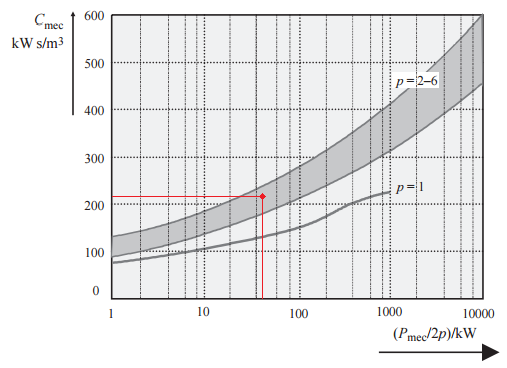

In [7]:
from IPython.display import Image
Image(filename='MachineConstant.png', width=450, height=450)

Cmec is selected as 210 kW S/m3 from the "machine constants of totally enclosed asynchronous and synchronous machines as a function of pole power" figure above.

In [8]:
Cmec=210*1e3 #in kw S/m3

### Step 2: Finding rotor size

In order to find X=l/D ratio, table below is utilized. Since the desired machine is an asynchronus machine, formula in red frame:

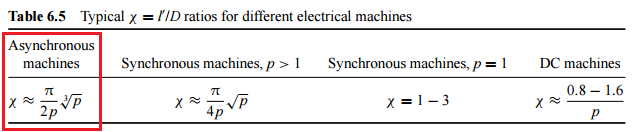

In [9]:
from IPython.display import Image
Image(filename='Table1.png', width=500, height=500)

From the formula above, ratio X can be found:

In [24]:
X=(math.pi/(2*Npoles))*(Npoles**(1./3.))
print ('l/D ratio is =',round(X,2))

l/D ratio is = 0.39


In order to find rotor diameter D and length l, formula below is utilized:

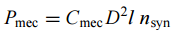

In [27]:
from IPython.display import Image
Image(filename='Formula1.png', width=150, height=150)

In [28]:
nsyn=(2*f)/Npoles
Drotor=(Prated/(Cmec*X*nsyn))**(1./3.) 
l=X*Drotor
print ('Rotor diameter is =',round(Drotor,2),'in m')
print ('Rotor length is =',round(l,2),'in m')

Rotor diameter is = 0.62 in m
Rotor length is = 0.24 in m


According to course textbook, the best theoretical diameter ratio (the ratio of the inner diameter of the stator to the outer diameter)is approximately 0.6. Then, we can calculate the stator diameter as below:

In [29]:
Dstator=Drotor/0.6
print('Stator diameter is =', round(Dstator,2),'in m')

Stator diameter is = 1.04 in m


### Step 3: Finding air-gap

An air gap δ of a 50 Hz asynchronous machine can be calculated in metres as a function of
power P with the equation below:

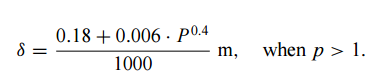

In [31]:
from IPython.display import Image
Image(filename='Formula2.png', width=250, height=250)

In [34]:
δ=(0.18+(0.006*(Prated**(0.4))))/1000
print('Air gap is =', round(δ,5),'in m')

Air gap is = 0.00105 in m


In drives for extremely heavy duty, the air gap is increased by 60%. Therefore;

In [35]:
δ=1.6*δ
print('Air gap is =', round(δ,5),'in m')

Air gap is = 0.00167 in m


However, the smallest technically possible air gap is approximately 0.2 mm according to textbook. Therefore, air gap is chosen as:

In [36]:
δ=0.002
print('Air gap is =', round(δ,3),'in m')

Air gap is = 0.002 in m
